In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [68]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
     r'D:\DATA SCEINCE\1. GL\8. EXTRA PROJECTS FOR RESUME\VILLAGE MODEL\New folder',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

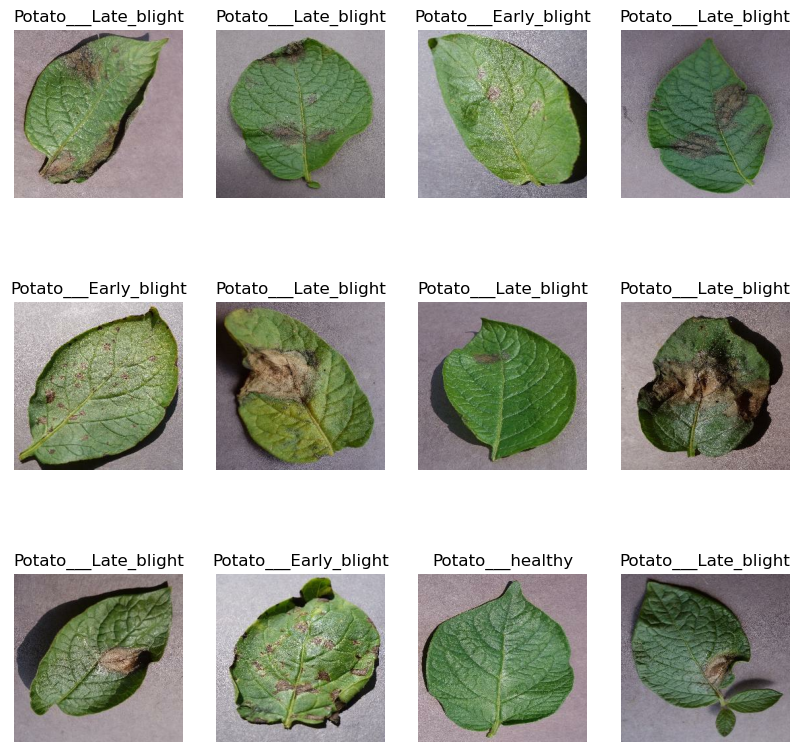

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [48]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [49]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [51]:

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [56]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [57]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 input_7 (InputLayer)        multiple                  0         
                                                                 
 conv2d_54 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_54 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [58]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
54/54 [==============================] - 878s 14s/step - loss: 0.9052 - accuracy: 0.4780 - val_loss: 0.8006 - val_accuracy: 0.5156
Epoch 2/5
54/54 [==============================] - 766s 14s/step - loss: 0.7640 - accuracy: 0.6128 - val_loss: 0.6408 - val_accuracy: 0.6875
Epoch 3/5
54/54 [==============================] - 510s 9s/step - loss: 0.4862 - accuracy: 0.7905 - val_loss: 0.3617 - val_accuracy: 0.8490
Epoch 4/5
54/54 [==============================] - 347s 6s/step - loss: 0.2880 - accuracy: 0.8947 - val_loss: 0.2989 - val_accuracy: 0.8594
Epoch 5/5
54/54 [==============================] - 300s 6s/step - loss: 0.2384 - accuracy: 0.9062 - val_loss: 0.1838 - val_accuracy: 0.9271


In [60]:
#TEST ON TEST DATASET
scores = model.evaluate(test_ds)

8/8 [==============================] - 142s 2s/step - loss: 0.1656 - accuracy: 0.9492


In [61]:
scores

[0.16558067500591278, 0.94921875]

In [62]:
#Plotting the Accuracy and Loss Curves
history

In [63]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [65]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9051860570907593,
 0.7639756798744202,
 0.48621469736099243,
 0.2880493402481079,
 0.2384490668773651]

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

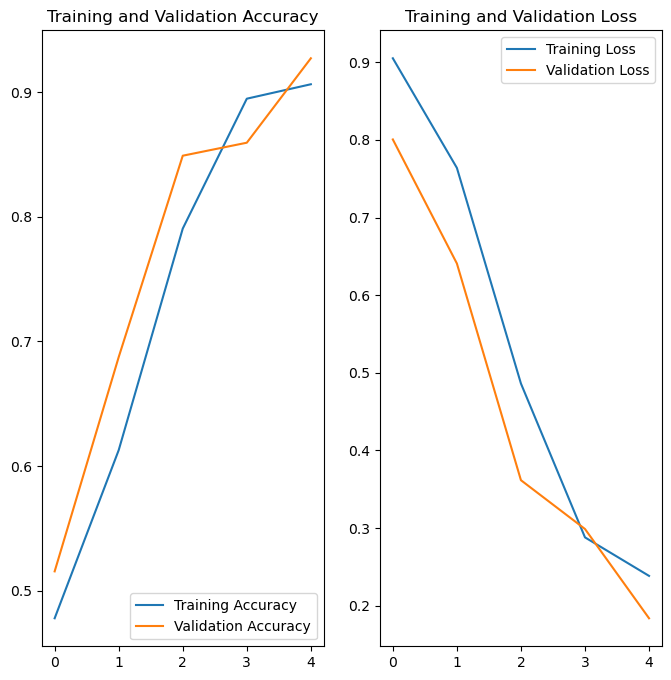

In [69]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 10s 10s/step
predicted label: Potato___Late_blight


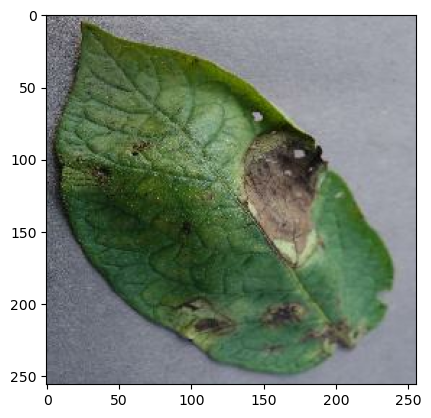

In [70]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
#an 8-bit unsigned integer

In [ ]:
#Write a function for inference

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
Now run inference on few sample images

1/1 [==============================] - 0s 78ms/step


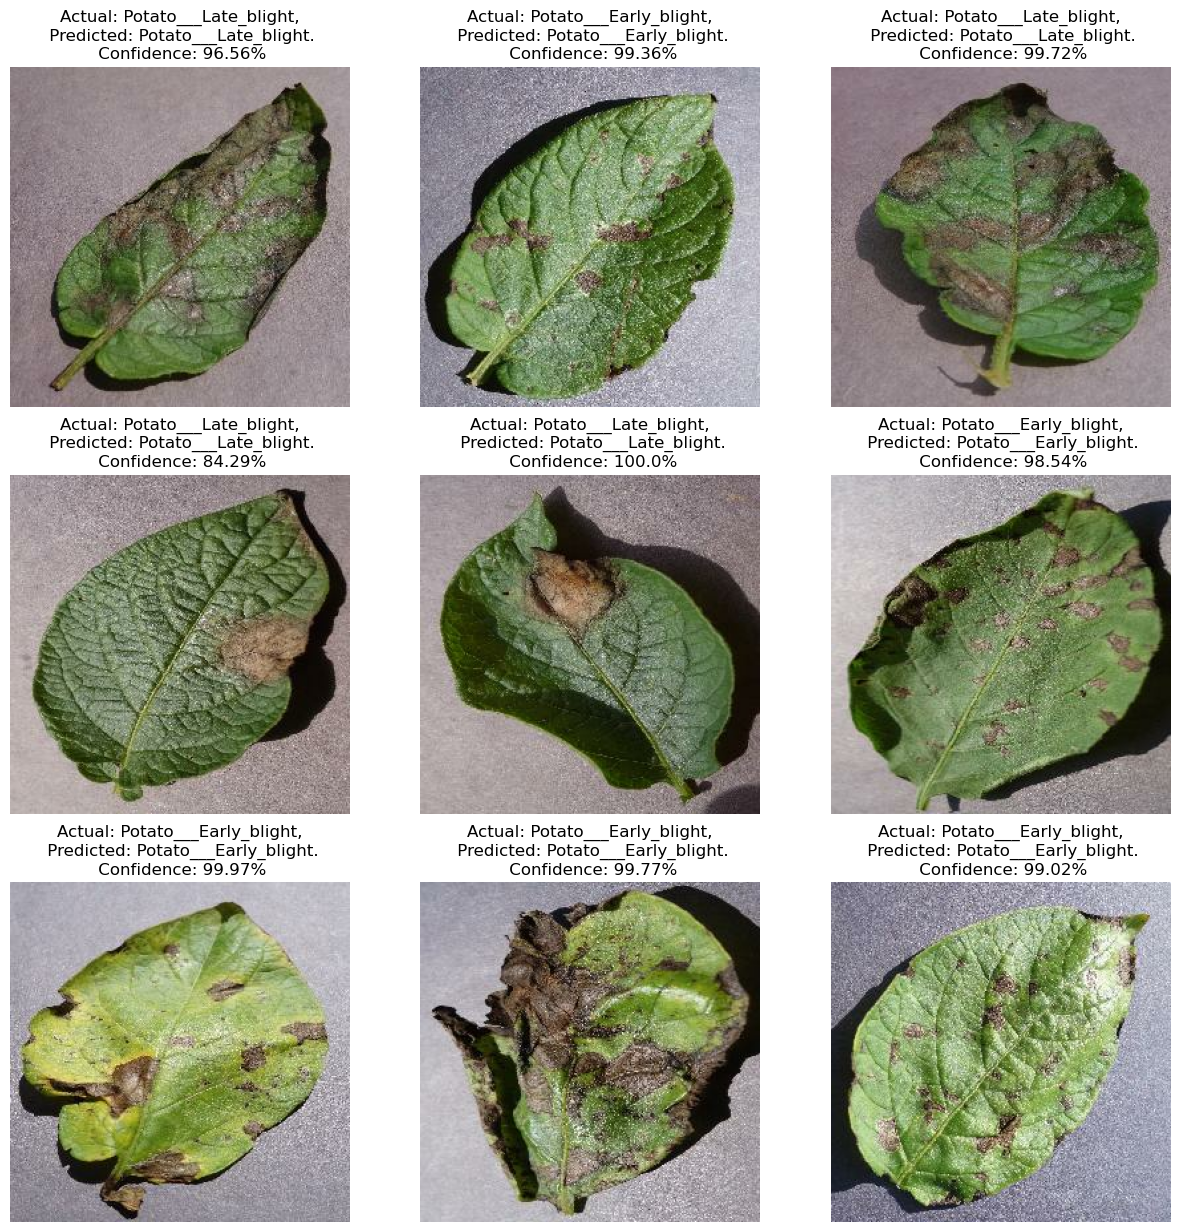

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
#Saving the Model
#We append the model to the list of models as a new version

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

In [ ]:
model.save("../potatoes.h5")

In [ ]:
# FAST API
#1 BUILT A REQUIREMNT TXT FILE
#RUN IT IN CONDA 
#LEARN IT IN 

In [16]:
#IMAGE GENERATOR API

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
#install split_folder
! pip install split-folders

In [23]:
import splitfolders
splitfolders.ratio(r"D:\DATA SCEINCE\1. GL\8. EXTRA PROJECTS FOR RESUME\VILLAGE MODEL\New folder", output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 2152 files [00:10, 214.89 files/s]


In [20]:
! pip install python_splitter 

In [22]:

import python_splitter
python_splitter.split_from_folder(r"D:\DATA SCEINCE\1. GL\8. EXTRA PROJECTS FOR RESUME\VILLAGE MODEL\New folder", train=0.5, test=0.3, val=0.2)

✅Checking SOURCE directory...
0.5 0.2 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [31]:
train_datagen=ImageDataGenerator(
     rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10
)
train_gen=train_datagen.flow_from_directory(r'C:\Users\user\FOR RESUME\DEEP_LEARNING_MODEL_ENDTOEND\output\train',
                                  target_size=(256,256),
                                  batch_size=32,
                                  class_mode='sparse')

Found 1721 images belonging to 3 classes.


In [32]:
for image_batch, labels_batch in train_gen:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [33]:
for image_batch, labels_batch in train_gen:
    print(image_batch[0])
    break

[[[0.6621079  0.65426475 0.7091667 ]
  [0.6617308  0.6538877  0.70878965]
  [0.65986687 0.65202373 0.7069257 ]
  ...
  [0.7483922  0.7483922  0.79545105]
  [0.7639674  0.7639674  0.8110262 ]
  [0.77583337 0.77583337 0.8228922 ]]

 [[0.65079576 0.6429526  0.6978546 ]
  [0.65182453 0.6439814  0.69888335]
  [0.6532225  0.64537936 0.7002813 ]
  ...
  [0.75025624 0.75025624 0.79731506]
  [0.76555    0.76555    0.81260884]
  [0.7749492  0.7749492  0.822008  ]]

 [[0.646902   0.6390589  0.69396085]
  [0.647368   0.6395249  0.69442683]
  [0.647834   0.63999087 0.6948928 ]
  ...
  [0.75212026 0.75212026 0.7991791 ]
  [0.766948   0.766948   0.81400687]
  [0.7721532  0.7721532  0.819212  ]]

 ...

 [[0.47817987 0.4656956  0.5109916 ]
  [0.48888615 0.47712144 0.5202587 ]
  [0.5067034  0.49493867 0.5380759 ]
  ...
  [0.6047884  0.5969453  0.64008254]
  [0.60898244 0.6011393  0.64427656]
  [0.6128627  0.60501957 0.6481568 ]]

 [[0.4707239  0.4587056  0.5026036 ]
  [0.49214816 0.48038346 0.5235207 ]


In [35]:
valid_datagen=ImageDataGenerator(
     rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10
)
valid_gen=valid_datagen.flow_from_directory(r'C:\Users\user\FOR RESUME\DEEP_LEARNING_MODEL_ENDTOEND\output\val',
                                  target_size=(256,256),
                                  batch_size=32,
                                  class_mode='sparse')

Found 215 images belonging to 3 classes.


In [36]:
test_datagen=ImageDataGenerator(
     rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10
)
test_gen=test_datagen.flow_from_directory(r'C:\Users\user\FOR RESUME\DEEP_LEARNING_MODEL_ENDTOEND\output\test',
                                  target_size=(256,256),
                                  batch_size=32,
                                  class_mode='sparse')

Found 216 images belonging to 3 classes.


In [38]:

input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [43]:
model.fit(train_gen,
          steps_per_epoch=47,
          batch_size=32,
          validation_data=valid_gen,
          validation_steps=6,
          epochs=5
    )

Epoch 1/5
47/47 [==============================] - 265s 6s/step - loss: 0.8763 - accuracy: 0.5084 - val_loss: 0.8796 - val_accuracy: 0.5469
Epoch 2/5
47/47 [==============================] - 192s 4s/step - loss: 0.7110 - accuracy: 0.6907 - val_loss: 0.5911 - val_accuracy: 0.7708
Epoch 3/5
47/47 [==============================] - 191s 4s/step - loss: 0.4634 - accuracy: 0.8069 - val_loss: 0.5158 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 190s 4s/step - loss: 0.3789 - accuracy: 0.8464 - val_loss: 0.4227 - val_accuracy: 0.8438
Epoch 5/5
47/47 [==============================] - 203s 4s/step - loss: 0.3192 - accuracy: 0.8904 - val_loss: 0.3300 - val_accuracy: 0.8646


In [73]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 8s 969ms/step - loss: 0.1656 - accuracy: 0.9492


In [74]:
scores

[0.16558068990707397, 0.94921875]

In [75]:
history

In [76]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [77]:
history.params
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [78]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9051860570907593,
 0.7639756798744202,
 0.48621469736099243,
 0.2880493402481079,
 0.2384490668773651]

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

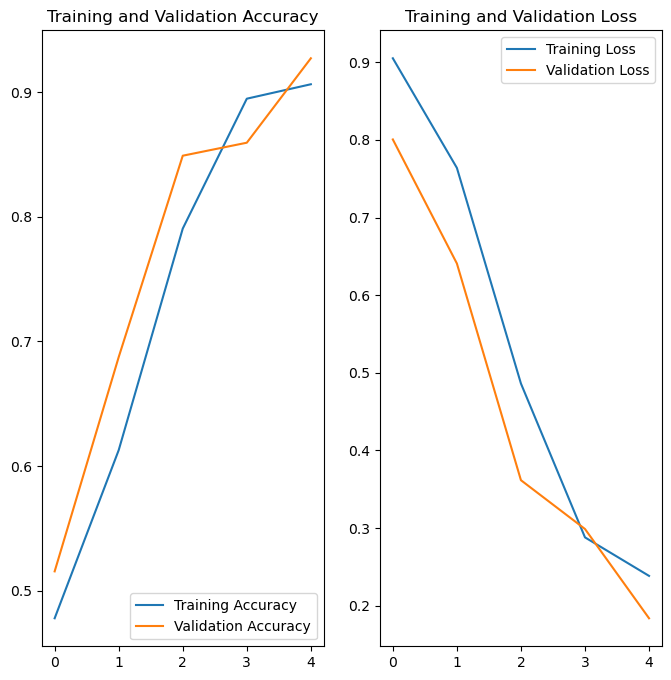

In [80]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()